# Background

This notebook contains some background information: results from the literature as it exists now.

In [1]:
# generic imports for rest of notebook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

## Existing literature

The following code summarizes the results I found in the papers cited at the end of this block, as well as from a model created by Noah Benson from pilot data that Catherine Olsson had gatherd (both members of the Winawer lab; see [next section](#Olsson-/-Benson-model) for details of the model). The data from the following papers was summarized by hand and is presented in the following figure as a summary.

- Sasaki, Y., Hadjikhani, N., Fischl, B., Liu, A. K., Marret, S., Dale, A. M., & Tootell, R. B. (2001). Local and global attention are mapped retinotopically in human occipital cortex. Proceedings of the National Academy of Sciences, 98(4), 2077–2082.

- Henriksson, L., Nurminen, L., Hyv\"arinen, Aapo, & Vanni, S. (2008). Spatial frequency tuning in human retinotopic visual areas. Journal of Vision, 8(10), 5. http://dx.doi.org/10.1167/8.10.5

- Kay, K. N., Naselaris, T., Prenger, R. J., & Gallant, J. L. (2008). Identifying Natural Images From Human Brain Activity. Nature, 452(7185), 352–355. http://dx.doi.org/10.1038/nature06713

- Hess, R. F., Li, X., Mansouri, B., Thompson, B., & Hansen, B. C. (2009). Selectivity as well as sensitivity loss characterizes the cortical spatial frequency deficit in amblyopia. Human Brain Mapping, 30(12), 4054–4069. http://dx.doi.org/10.1002/hbm.20829

- Kay, K. N. (2011). Understanding Visual Representation By Developing Receptive-Field Models. Visual Population Codes: Towards a Common Multivariate Framework for Cell Recording and Functional Imaging, (), 133–162.

- D'Souza, D. V., Auer, T., Frahm, J., Strasburger, H., & Lee, B. B. (2016). Dependence of chromatic responses in v1 on visual field eccentricity and spatial frequency: an fmri study. JOSA A, 33(3), 53–64.

- Farivar, R., Clavagnier, S., Hansen, B. C., Thompson, B., & Hess, R. F. (2017). Non-uniform phase sensitivity in spatial frequency maps of the human visual cortex. The Journal of Physiology, 595(4), 1351–1363. http://dx.doi.org/10.1113/jp273206

In [2]:
data_dict = {
    'Paper': ['Sasaki (2001)',]*7,
    'Optimum SF (cpd)': [1.25, .9, .75, .7, .6, .5, .4],
    'Eccentricity': [0, 1, 2, 3, 4, 5, 12]
}
data_dict['Paper'].extend(['Henriksson (2008)', ]*5)
data_dict['Optimum SF (cpd)'].extend([1.2, .68, .46, .40, .18])
data_dict['Eccentricity'].extend([1.7, 4.7, 6.3, 9, 19])

data_dict['Paper'].extend(['Kay (2008)']+['Kay (2011)']*5)
data_dict['Optimum SF (cpd)'].extend([4.5, 4, 3, 10, 10, 2])
data_dict['Eccentricity'].extend([ 2.9, 2.5, 4, .5, 1.5, 7])

data_dict['Paper'].extend(["Hess (dominant eye, 2009)"]*3)
data_dict['Optimum SF (cpd)'].extend([2.25, 1.9, 1.75])
data_dict['Eccentricity'].extend([2.5, 5, 10])

data_dict['Paper'].extend([ "D'Souza (2016)",]*3)
data_dict['Optimum SF (cpd)'].extend([2, .95, .4])
data_dict['Eccentricity'].extend([1.4, 4.6, 9.8])

data_dict['Paper'].extend(['Farivar (2017)']*2)
data_dict['Optimum SF (cpd)'].extend([3, 1.5,])
data_dict['Eccentricity'].extend([.5, 3])

data_dict['Paper'].extend([ 'Olsson (pilot)']*10)
data_dict['Optimum SF (cpd)'].extend([2.11, 1.76, 1.47, 2.75, 1.24, 1.06, .88, .77, .66, .60])
data_dict['Eccentricity'].extend([2, 3, 4, 1, 5, 6, 7, 8, 9, 10])

df = pd.DataFrame(data_dict)
df = df.sort(['Paper','Eccentricity',])

/home/billbrod/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


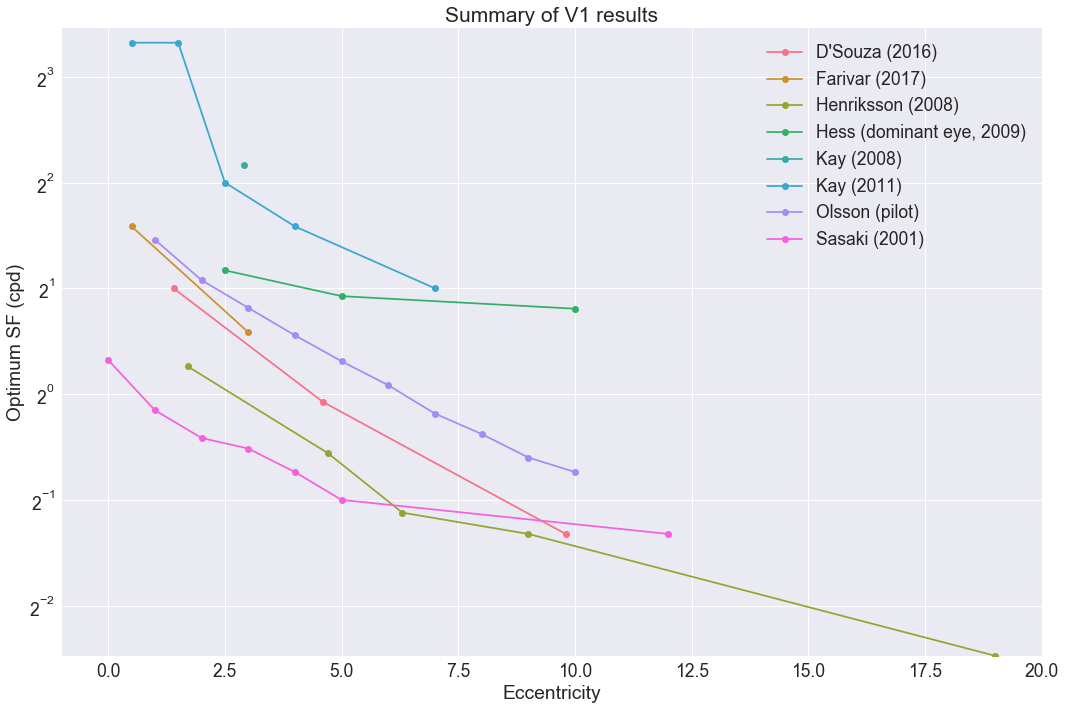

In [8]:
with sns.plotting_context('notebook', font_scale=1.75):
    g = sns.FacetGrid(df, hue='Paper', size=10, aspect=1.5)
    g.map(plt.semilogy, 'Eccentricity', 'Optimum SF (cpd)', marker='o', basey=2)
    g.ax.set_xlim((-1, 20))
    g.ax.set_ylim((0, 11))
    g.ax.legend(loc='best')
    g.ax.set_title("Summary of V1 results")
    # g.savefig('Summary.svg')

## Olsson / Benson model

Noah Benson created this model based on pilot data that Catherine Olsson had gathered and it showed up in his VSS 2017 presentation about the Standard Cortical Observer model. It's a log-Gaussian fit to data not shown here.

In [9]:
c = [2.52529, 1.57448, .453992, .252451, .293989]
freqs = np.linspace(.25, 6, 100)
ecc = np.linspace(1,10, 10)
sensitivity = []
for r in ecc:
    sensitivity.append(c[0]/freqs * np.exp(-.5 * ((np.log(freqs)-(c[1]+r**c[2]))/(c[3]+r**c[4]))**2))
    print("For eccentricity %s, peak sensitivity at frequency %s"%(r, freqs[np.argmax(sensitivity[-1])]))
sensitivity = np.array(sensitivity)

For eccentricity 1.0, peak sensitivity at frequency 2.74747474747
For eccentricity 2.0, peak sensitivity at frequency 2.10858585859
For eccentricity 3.0, peak sensitivity at frequency 1.7601010101
For eccentricity 4.0, peak sensitivity at frequency 1.4696969697
For eccentricity 5.0, peak sensitivity at frequency 1.23737373737
For eccentricity 6.0, peak sensitivity at frequency 1.06313131313
For eccentricity 7.0, peak sensitivity at frequency 0.888888888889
For eccentricity 8.0, peak sensitivity at frequency 0.772727272727
For eccentricity 9.0, peak sensitivity at frequency 0.656565656566
For eccentricity 10.0, peak sensitivity at frequency 0.598484848485


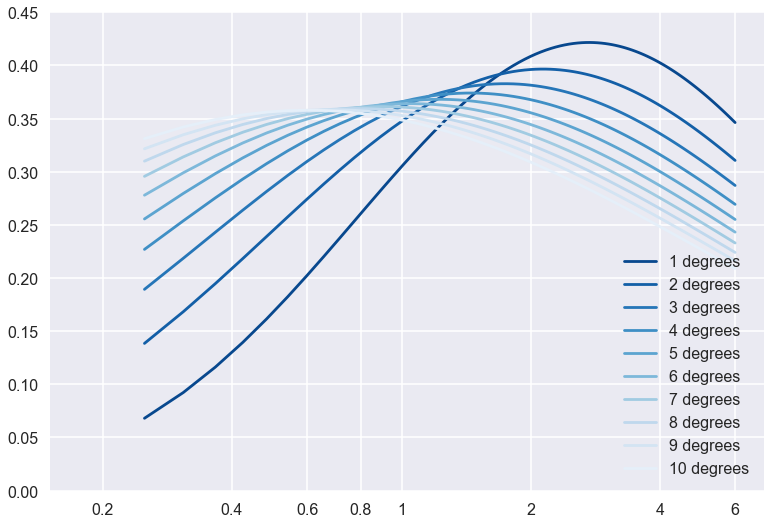

In [10]:
with sns.plotting_context("poster"):
    pal = sns.palettes.color_palette('Blues_r', 10)
    fig, ax = plt.subplots()
    for i, d in enumerate(sensitivity):
        ax.semilogx(freqs, d, color=pal[i], label='%s degrees' % (i+1))
    freq_floor = .75
    # ax.plot([freq_floor, freq_floor], [.1, .45], 'k--')
    # ax.plot([4*freq_floor, 4*freq_floor], [.1, .45], 'k--')
    ax.set_xlim((.15, 7))
    ax.set_ylim((0, .45))
    plt.legend(loc='lower right')
    _=plt.xticks([.2, .4, .6, .8, 1, 2, 4, 6,], [.2, .4, .6, .8, 1, 2, 4, 6,])